In [1]:
from google_drive_downloader import GoogleDriveDownloader as gdd
gdd.download_file_from_google_drive(file_id='1rzWWN6GaNhFiVwF-BrRICRchpFBrEnut',dest_path='content/JOB-A-THON.zip',unzip=True)

Unzipping...Done.


In [2]:
#Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [3]:
#Loading the training and testing data
train_data = pd.read_csv("/content/content/train_Df64byy.csv")
test_data = pd.read_csv("/content/content/test_YCcRUnU.csv")

In [ ]:
train_data.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [ ]:
# Displaying total records in training and testing data
print("There are {} rows and {} columns in training data.".format(train_data.shape[0],train_data.shape[1]))
print("There are {} rows and {} columns in testing data.".format(test_data.shape[0],test_data.shape[1]))

There are 50882 rows and 14 columns in training data.
There are 21805 rows and 13 columns in testing data.


In [ ]:
#Exploratory Data Analysis for training data
#Checking the dtypes and info of the training dataset
train_data.describe()

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,50882.000000,50882.000000,50882.000000,50882.000000,30631.000000,50882.000000,50882.000000,50882.000000
mean,25441.500000,1732.788707,44.856275,42.738866,2.439228,15.115188,14183.950069,0.239947
std,14688.512535,1424.081652,17.310271,17.319375,1.025923,6.340663,6590.074873,0.427055
min,1.000000,1.000000,18.000000,16.000000,1.000000,1.000000,2280.000000,0.000000
25%,12721.250000,523.000000,28.000000,27.000000,1.000000,12.000000,9248.000000,0.000000
50%,25441.500000,1391.000000,44.000000,40.000000,3.000000,17.000000,13178.000000,0.000000
75%,38161.750000,2667.000000,59.000000,57.000000,3.000000,20.000000,18096.000000,0.000000
max,50882.000000,6194.000000,75.000000,75.000000,4.000000,22.000000,43350.400000,1.000000


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

In [ ]:
#Checking the null values
train_data.isnull().any()

ID                         False
City_Code                  False
Region_Code                False
Accomodation_Type          False
Reco_Insurance_Type        False
Upper_Age                  False
Lower_Age                  False
Is_Spouse                  False
Health Indicator            True
Holding_Policy_Duration     True
Holding_Policy_Type         True
Reco_Policy_Cat            False
Reco_Policy_Premium        False
Response                   False
dtype: bool

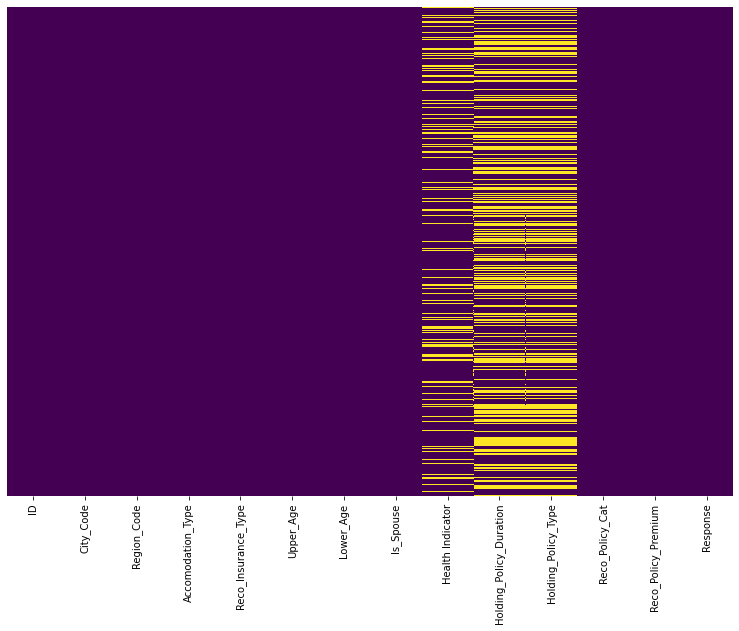

In [ ]:
# Visulizing null values
plt.figure(figsize=(13,9))
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [ ]:
#Investigating average null values
features_with_nan = [feature for feature in train_data.columns if train_data[feature].isnull().sum()>=1]
for features in features_with_nan:
  print(features,np.round(train_data[features].isnull().mean(),4),'%missing values')

Health Indicator 0.2298 %missing values
Holding_Policy_Duration 0.398 %missing values
Holding_Policy_Type 0.398 %missing values


In [ ]:
#Understanding the relationship between missing values and target values
for feature in features_with_nan:
  data_copy = train_data.copy()
  data_copy[feature] = np.where(data_copy[feature].isnull(),1,0)
  print(chi2_contingency(pd.crosstab(data_copy[feature],train_data['Response'])))

(2.7110256745098207, 0.09965689805327917, 1, array([[29787.22422468,  9403.77577532],
       [ 8885.77577532,  2805.22422468]]))
(0.17408208394698832, 0.6765091224363439, 1, array([[23281.1733619,  7349.8266381],
       [15391.8266381,  4859.1733619]]))
(0.17408208394698832, 0.6765091224363439, 1, array([[23281.1733619,  7349.8266381],
       [15391.8266381,  4859.1733619]]))


### The above matrix shows that the missing feature are not related with the target value since the p-value for the features > 0.05

In [ ]:
#Numerical Variables in data
numerical_features = [feature for feature in train_data.columns if train_data[feature].dtypes!='O']
print("The number of numerical variables in dataset is :{}".format(len(numerical_features)))
train_data[numerical_features].head()

The number of numerical variables in dataset is :8


,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,3213,36,36,3.0,22,11628.0,0
1,2,1117,75,22,NaN,22,30510.0,0
2,3,3732,32,32,1.0,19,7450.0,1
3,4,4378,52,48,3.0,19,17780.0,0
4,5,2190,44,44,1.0,16,10404.0,0


In [ ]:
#Discrete variables in data
discrete_features = [feature for feature in numerical_features if len(train_data[feature].unique())<25 and feature not in ['Response'] ]
print("The number of discrete features are :{} ".format(len(discrete_features)))
train_data[discrete_features].head()

The number of discrete features are :2 


,Holding_Policy_Type,Reco_Policy_Cat
0,3.0,22
1,NaN,22
2,1.0,19
3,3.0,19
4,1.0,16


In [ ]:
#Relationship between target and discrete features
for feature in discrete_features:
  data_copy = train_data.copy()
  print(chi2_contingency(pd.crosstab(data_copy[feature],train_data['Response'])))

(2.7827600712944203, 0.42634578504540277, 3, array([[ 6206.52779864,  1966.47220136],
       [ 3800.76735986,  1204.23264014],
       [10083.99396037,  3195.00603963],
       [ 3169.71088113,  1004.28911887]]))
(1987.7494053076875, 0.0, 21, array([[1495.02360363,  471.97639637],
       [1457.02097009,  459.97902991],
       [ 804.89577847,  254.10422153],
       [ 771.45346095,  243.54653905],
       [ 765.37303958,  241.62696042],
       [ 646.80482292,  204.19517708],
       [ 633.88392752,  200.11607248],
       [ 589.80087261,  186.19912739],
       [ 599.68155733,  189.31844267],
       [ 585.24055658,  184.75944342],
       [ 593.60113596,  187.39886404],
       [1647.79419048,  520.20580952],
       [1279.92869777,  404.07130223],
       [1324.01175268,  417.98824732],
       [1227.48506348,  387.51493652],
       [3104.0551079 ,  979.9448921 ],
       [2854.75783185,  901.24216815],
       [4220.57248143, 1332.42751857],
       [2818.27530364,  889.72469636],
       [2414.68733

### The above test shows that the column 'Reco_Policy_Cat' is related to target variable 'Response' since its p-value < 0.05

In [ ]:
#Continuous features
continous_features = [feature for feature in numerical_features if feature not in discrete_features and feature not in ['ID']]
print("The number of continous variables are : {}".format(len(continous_features)))
train_data[continous_features].head()

The number of continous variables are : 5


,Region_Code,Upper_Age,Lower_Age,Reco_Policy_Premium,Response
0,3213,36,36,11628.0,0
1,1117,75,22,30510.0,0
2,3732,32,32,7450.0,1
3,4378,52,48,17780.0,0
4,2190,44,44,10404.0,0


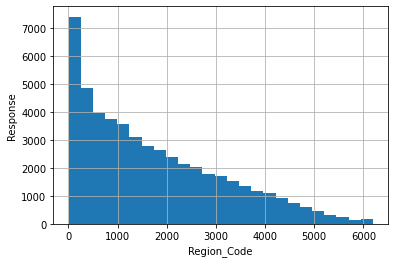

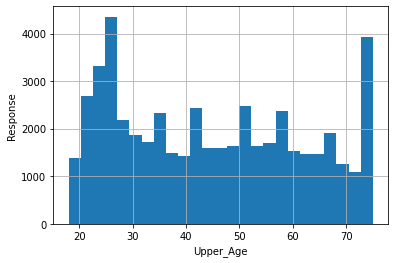

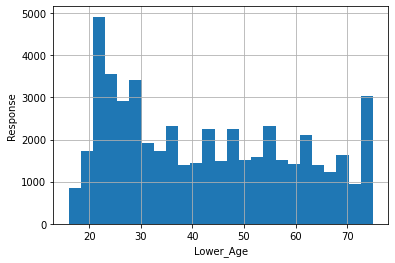

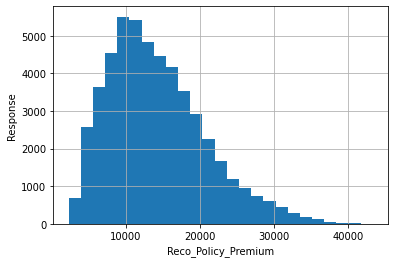

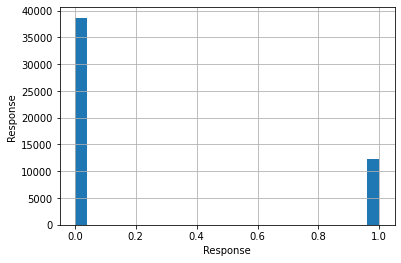

In [ ]:
#Relationship between continous feature and target
for fetaure in continous_features:
  data_copy = train_data.copy()
  data_copy[fetaure].hist(bins=25)
  plt.xlabel(fetaure)
  plt.ylabel('Response')
  plt.show()

### From the visulaization, it appears that all the continous features are right skewed distributed.

In [ ]:
# Applying chi-squared test on continous data
for feature in continous_features:
    data_copy = train_data.copy()
    print(chi2_contingency(pd.crosstab(data_copy[feature],train_data['Response'])))

(5294.103798017927, 0.5778800960227055, 5315, array([[72.96505641, 23.03494359],
       [55.48384497, 17.51615503],
       [55.48384497, 17.51615503],
       ...,
       [ 0.76005267,  0.23994733],
       [ 0.76005267,  0.23994733],
       [ 0.76005267,  0.23994733]]))
(75.73754202340912, 0.049095554608295316, 57, array([[  88.16610982,   27.83389018],
       [ 391.42712551,  123.57287449],
       [ 576.11992453,  181.88007547],
       [ 857.33941276,  270.66058724],
       [1187.96232459,  375.03767541],
       [1270.04801305,  400.95198695],
       [1255.6070123 ,  396.3929877 ],
       [1249.52659094,  394.47340906],
       [1110.43695216,  350.56304784],
       [ 947.02562792,  298.97437208],
       [ 910.54309972,  287.45690028],
       [ 755.49235486,  238.50764514],
       [ 741.05135411,  233.94864589],
       [ 681.00719311,  214.99280689],
       [ 692.40798318,  218.59201682],
       [ 620.96303211,  196.03696789],
       [ 611.84240006,  193.15759994],
       [ 612.60245273

### From above, it appears that Upper_Age and Lower_Age columns are related to target variable 'Response'

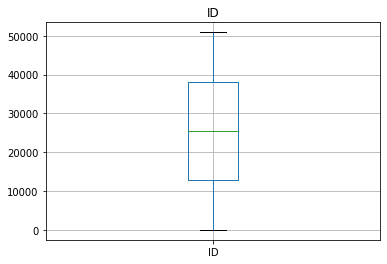

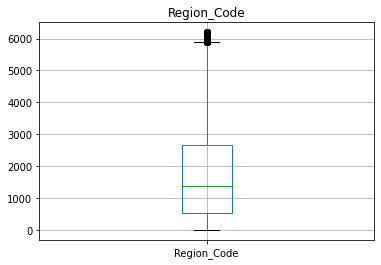

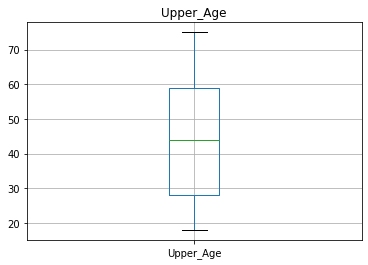

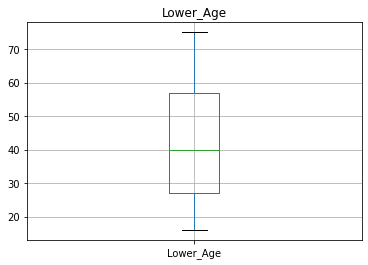

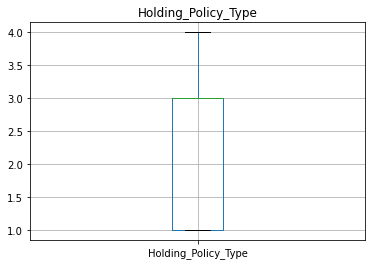

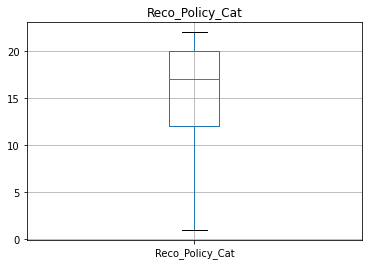

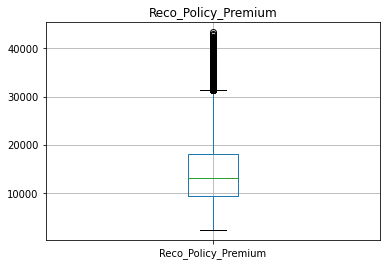

In [ ]:
#Detecting Outliers
for feature in numerical_features:
  data_copy = train_data.copy()
  if 0 in train_data[feature].unique():
    pass
  else:
    data_copy[fetaure] = np.log(data_copy[feature])
    data_copy.boxplot(column=feature)
    
    plt.title(feature)
    plt.show()

### From the above box-plot, it appears that the columns 'Region_Code' and 'Reco_Policy_Premium' contains outliers.

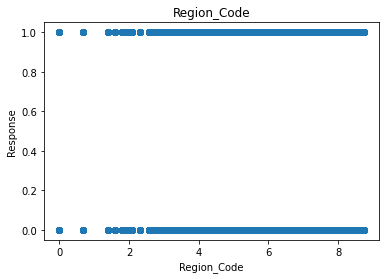

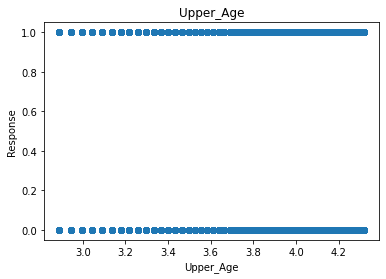

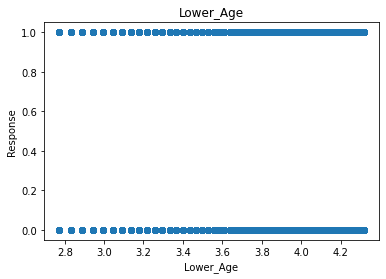

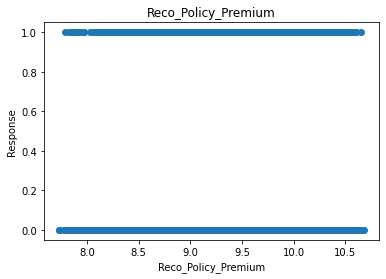

In [ ]:
#Further, visualizing outliers with log normalization
for feature in continous_features:
    data_copy = train_data.copy()
    if 0 in data_copy[feature].unique():
        pass
    else:
        data_copy[feature] = np.log(data_copy[feature])
        plt.scatter(data_copy[feature],data_copy['Response'])
        plt.xlabel(feature)
        plt.ylabel('Response')
        plt.title(feature)
        plt.show()

### From the above Scatter Plot, it appears that the column 'Region_Code' contains some outliers

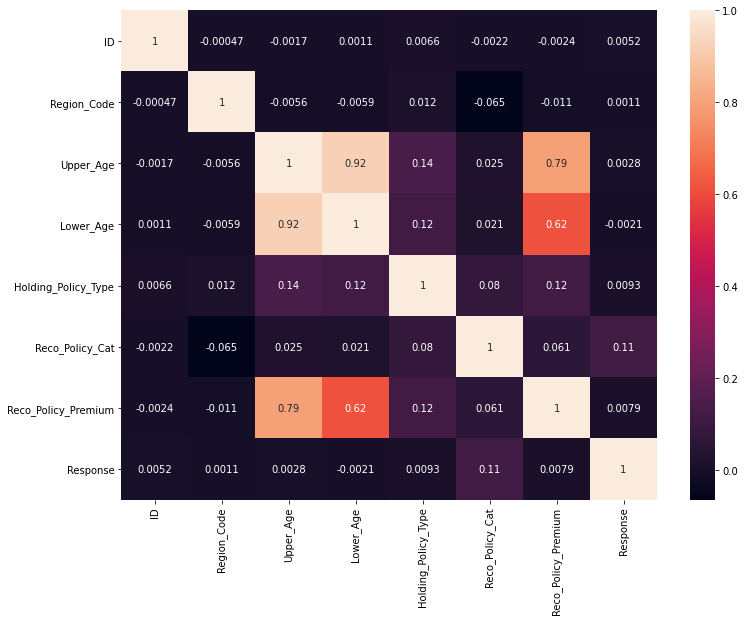

In [ ]:
# Computing the correlation b/w the features
plt.figure(figsize=(12,9))
sns.heatmap(train_data[numerical_features].corr(),annot=True)

### From the above heatmap, it appears that columns 'Upper_Age' and 'Lower_Age' are positive correlated with the score of 0.92

In [ ]:
#Analysing categorical features
categorical_features = [feature for feature in train_data.columns if feature not in numerical_features]
print("The number of categorical features is : {}".format(len(categorical_features)))
train_data[categorical_features].head()

The number of categorical features is : 6


,City_Code,Accomodation_Type,Reco_Insurance_Type,Is_Spouse,Health Indicator,Holding_Policy_Duration
0,C3,Rented,Individual,No,X1,14+
1,C5,Owned,Joint,No,X2,NaN
2,C5,Owned,Individual,No,NaN,1.0
3,C24,Owned,Joint,No,X1,14+
4,C8,Rented,Individual,No,X2,3.0


In [ ]:
#Determining the cardinality of the categorical features
for feature in categorical_features:
  print("The feature is {} and its cardinality is {}".format(feature,len(train_data[feature].unique())))

The feature is City_Code and its cardinality is 36
The feature is Accomodation_Type and its cardinality is 2
The feature is Reco_Insurance_Type and its cardinality is 2
The feature is Is_Spouse and its cardinality is 2
The feature is Health Indicator and its cardinality is 10
The feature is Holding_Policy_Duration and its cardinality is 16


### The Highest Cardinality is of City_Code which is 36.

In [ ]:
# Visualizing size or count of categorical values
for feature in categorical_features:
    data_copy = train_data.copy()
    print(chi2_contingency(pd.crosstab(data_copy[feature],train_data['Response'])))

(29.622432040915207, 0.7251180856306821, 35, array([[6.81995262e+03, 2.15304738e+03],
       [1.22444485e+03, 3.86555147e+02],
       [8.71780414e+02, 2.75219586e+02],
       [6.59725718e+02, 2.08274282e+02],
       [7.63852934e+02, 2.41147066e+02],
       [5.66999292e+02, 1.79000708e+02],
       [9.01422468e+02, 2.84577532e+02],
       [8.62659781e+02, 2.72340219e+02],
       [8.80901046e+02, 2.78098954e+02],
       [6.05761979e+02, 1.91238021e+02],
       [6.83287351e+02, 2.15712649e+02],
       [5.88812804e+03, 1.85887196e+03],
       [7.03808773e+02, 2.22191227e+02],
       [5.16075764e+02, 1.62924236e+02],
       [3.92187178e+02, 1.23812822e+02],
       [4.46150918e+02, 1.40849082e+02],
       [4.20309127e+02, 1.32690873e+02],
       [2.78179278e+02, 8.78207225e+01],
       [3.79266283e+02, 1.19733717e+02],
       [2.24215538e+02, 7.07844621e+01],
       [2.16615011e+02, 6.83849888e+01],
       [2.94140384e+02, 9.28596164e+01],
       [3.71589751e+03, 1.17310249e+03],
       [4.40

### From the above statistics, it appears that features 'Reco_Insurance_Type' and 'Holding_Policy_Duration' are related to target variable since it's p-value < 0.05

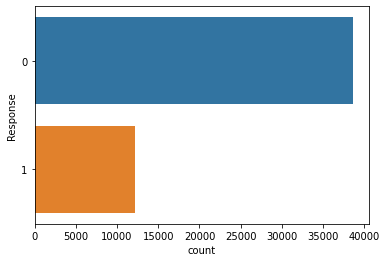

In [ ]:
# Checking the imbalanceness in the target variable 
sns.countplot(y=train_data['Response'])

### From above countplot, it appears that there is a problem of class imbalanceness as there are more number of examples in class 0 (upto 40,000) than class 1(around 13500)

In [ ]:
# Handling missing values
#Listing Null values in Numerical data
numerical_with_nan = [feature for feature in train_data.columns if train_data[feature].isnull().sum()>=1 and train_data[feature].dtypes!='O' ]
for feature in numerical_with_nan:
    print(feature,np.round(train_data[feature].isnull().mean(),4),'%missing values')

Holding_Policy_Type 0.398 %missing values


In [ ]:
# Filling the missing values with mean
for feature in numerical_with_nan:
    mean_value = train_data[feature].mean()
    train_data[feature+'_nan'] = np.where(train_data[feature].isnull(),1,0)
    train_data[feature] = train_data[feature].fillna(mean_value)
train_data[numerical_with_nan].isnull().sum()

Holding_Policy_Type    0
dtype: int64

In [ ]:
train_data.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Holding_Policy_Type_nan
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.000000,22,11628.0,0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,2.439228,22,30510.0,0,1
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.000000,19,7450.0,1,0
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.000000,19,17780.0,0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.000000,16,10404.0,0,0


In [ ]:
# Dropping Employee Id column as it donot contribute in prediction.
train_data = train_data.drop(columns=['ID'])
train_data.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Holding_Policy_Type_nan
0,C3,3213,Rented,Individual,36,36,No,X1,14+,3.000000,22,11628.0,0,0
1,C5,1117,Owned,Joint,75,22,No,X2,NaN,2.439228,22,30510.0,0,1
2,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.000000,19,7450.0,1,0
3,C24,4378,Owned,Joint,52,48,No,X1,14+,3.000000,19,17780.0,0,0
4,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.000000,16,10404.0,0,0


In [ ]:
#Listing null values in categorical data
features_with_nan = [feature for feature in train_data.columns if train_data[feature].isnull().sum()>=1 and train_data[feature].dtypes=='O']
for feature in features_with_nan:
    print(feature,np.round(train_data[feature].isnull().mean(),4),'%missing values')

Health Indicator 0.2298 %missing values
Holding_Policy_Duration 0.398 %missing values


In [ ]:
def replace_cat_feature(dataset,features_with_nan):
    data = train_data.copy()
    data[features_with_nan] = data[features_with_nan].fillna("Missing")
    return data
train_data = replace_cat_feature(train_data,features_with_nan)
train_data[features_with_nan].isnull().sum()

Health Indicator           0
Holding_Policy_Duration    0
dtype: int64

# Performing Feature Engineering 

In [ ]:
train_data.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Holding_Policy_Type_nan
0,C3,3213,Rented,Individual,36,36,No,X1,14+,3.000000,22,11628.0,0,0
1,C5,1117,Owned,Joint,75,22,No,X2,Missing,2.439228,22,30510.0,0,1
2,C5,3732,Owned,Individual,32,32,No,Missing,1.0,1.000000,19,7450.0,1,0
3,C24,4378,Owned,Joint,52,48,No,X1,14+,3.000000,19,17780.0,0,0
4,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.000000,16,10404.0,0,0


In [ ]:
# Since, Upper_Age and Lower_Age columns are strongly correlated, therefore dropping the Lower_Age column and renaming the Upper_Age column to Age
train_data = train_data.drop(columns=['Lower_Age'],axis=1)
train_data = train_data.rename(columns={'Upper_Age':"Age"})
train_data.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Holding_Policy_Type_nan
0,C3,3213,Rented,Individual,36,No,X1,14+,3.000000,22,11628.0,0,0
1,C5,1117,Owned,Joint,75,No,X2,Missing,2.439228,22,30510.0,0,1
2,C5,3732,Owned,Individual,32,No,Missing,1.0,1.000000,19,7450.0,1,0
3,C24,4378,Owned,Joint,52,No,X1,14+,3.000000,19,17780.0,0,0
4,C8,2190,Rented,Individual,44,No,X2,3.0,1.000000,16,10404.0,0,0


In [ ]:
# Feature Engineering Numerical Discrete Features: ['Holding_Policy_Type', 'Reco_Policy_Cat']
# 1. Holding_Policy_Type
max_cat_policy_type = train_data['Holding_Policy_Type'].value_counts().index[1]   #3.0
min_cat_policy_type = train_data['Holding_Policy_Type'].value_counts().index[-1]  #4.0
train_data['Holding_Policy_Type_Max_count'] = np.where(train_data['Holding_Policy_Type']== max_cat_policy_type,1,0)
train_data['Holding_Policy_Type_Min_count'] = np.where(train_data['Holding_Policy_Type']== min_cat_policy_type,1,0)

# 2. Reco_Policy_Cat
max_count_health = train_data['Reco_Policy_Cat'].value_counts().index[0]
min_count_health = train_data['Reco_Policy_Cat'].value_counts().index[-1]
train_data['Reco_Policy_Cat_Max'] = np.where(train_data['Reco_Policy_Cat']== max_count_health,1,0)
train_data['Reco_Policy_Cat_Min'] = np.where(train_data['Reco_Policy_Cat']== min_count_health,1,0)

In [ ]:
# Feature Engineering Numerical Continuous Features: ['Region_Code', 'Age','Reco_Policy_Premium']
# 1. Region_Code
for i in range(train_data.shape[0]):
  if train_data["Region_Code"][i] in range(0,1001):
    train_data['Region_Code'][i] = 'Code within 1000'
  elif train_data["Region_Code"][i] in range(1001,2001):
    train_data['Region_Code'][i] = 'Code within 2000'
  elif train_data["Region_Code"][i] in range(2001,3001):
    train_data['Region_Code'][i] = 'Code within 3000'
  elif train_data["Region_Code"][i] in range(3001,4001):
    train_data['Region_Code'][i] = 'Code within 4000'
  elif train_data["Region_Code"][i] in range(4001,7001):
    train_data['Region_Code'][i] = 'Code within 7000'

# 2. 'Age'
for i in range(train_data.shape[0]):
  if train_data["Age"][i] in range(0,31):
    train_data['Age'][i] = 'Within_30'
  elif train_data["Age"][i] in range(31,46):
    train_data['Age'][i] = 'Within_45'
  elif train_data["Age"][i] in range(46,61):
    train_data['Age'][i] = 'Within_60'
  elif train_data["Age"][i] in range(61,81):
    train_data['Age'][i] = 'Above_60'

# 3. 'Reco_Policy_Premium'
mean_premium = train_data['Reco_Policy_Premium'].mean()
train_data['Reco_Policy_Premium_Less'] = np.where(train_data['Reco_Policy_Premium']<=mean_premium,1,0)
train_data['Reco_Policy_Premium_More'] = np.where(train_data['Reco_Policy_Premium']>mean_premium,1,0)

In [ ]:
# Feature Engineering Categorical Features: [City_Code,Accomodation_Type,Reco_Insurance_Type,Is_Spouse,Health Indicator,Holding_Policy_Duration]
#1. Is_Spouse
train_data["Married"] = np.where(train_data['Is_Spouse']=='Yes',1,0)
train_data["UnMarried"] = np.where(train_data['Is_Spouse']=='No',1,0)

#2. Health Indicator
indicator_max_count = train_data['Health Indicator'].value_counts().index[0]
indicator_min_count = train_data['Health Indicator'].value_counts().index[-1]
indicator_mising_count = train_data['Health Indicator'].value_counts().index[1]
train_data['Health Indicator_Max'] = np.where(train_data['Health Indicator']== indicator_max_count,1,0)
train_data['Health Indicator_Min'] = np.where(train_data['Health Indicator']== indicator_min_count,1,0)

In [ ]:
train_data.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Holding_Policy_Type_nan,Holding_Policy_Type_Max_count,Holding_Policy_Type_Min_count,Reco_Policy_Cat_Max,Reco_Policy_Cat_Min,Reco_Policy_Premium_Less,Reco_Policy_Premium_More,Married,UnMarried,Health Indicator_Max,Health Indicator_Min
0,C3,Code within 4000,Rented,Individual,Within_45,No,X1,14+,3.000000,22,11628.0,0,0,1,0,1,0,1,0,0,1,1,0
1,C5,Code within 2000,Owned,Joint,Above_60,No,X2,Missing,2.439228,22,30510.0,0,1,0,0,1,0,0,1,0,1,0,0
2,C5,Code within 4000,Owned,Individual,Within_45,No,Missing,1.0,1.000000,19,7450.0,1,0,0,0,0,0,1,0,0,1,0,0
3,C24,Code within 7000,Owned,Joint,Within_60,No,X1,14+,3.000000,19,17780.0,0,0,1,0,0,0,0,1,0,1,1,0
4,C8,Code within 3000,Rented,Individual,Within_45,No,X2,3.0,1.000000,16,10404.0,0,0,0,0,0,0,1,0,0,1,0,0


In [ ]:
categorical_features = [feature for feature in train_data.columns if train_data[feature].dtypes=='O']
train_data[categorical_features].head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Age,Is_Spouse,Health Indicator,Holding_Policy_Duration
0,C3,Code within 4000,Rented,Individual,Within_45,No,X1,14+
1,C5,Code within 2000,Owned,Joint,Above_60,No,X2,Missing
2,C5,Code within 4000,Owned,Individual,Within_45,No,Missing,1.0
3,C24,Code within 7000,Owned,Joint,Within_60,No,X1,14+
4,C8,Code within 3000,Rented,Individual,Within_45,No,X2,3.0


In [ ]:
# Encoding Categorical Features
for feature in categorical_features:
    labels_ordered = train_data.groupby([feature])['Response'].mean().sort_values().index
    labels_ordered = {k:i for i,k in enumerate(labels_ordered,0)}
    train_data[feature]=train_data[feature].map(labels_ordered)

In [ ]:
train_data.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Holding_Policy_Type_nan,Holding_Policy_Type_Max_count,Holding_Policy_Type_Min_count,Reco_Policy_Cat_Max,Reco_Policy_Cat_Min,Reco_Policy_Premium_Less,Reco_Policy_Premium_More,Married,UnMarried,Health Indicator_Max,Health Indicator_Min
0,19,4,0,0,3,0,8,9,3.000000,22,11628.0,0,0,1,0,1,0,1,0,0,1,1,0
1,9,2,1,1,1,0,6,6,2.439228,22,30510.0,0,1,0,0,1,0,0,1,0,1,0,0
2,9,4,1,0,3,0,2,0,1.000000,19,7450.0,1,0,0,0,0,0,1,0,0,1,0,0
3,13,0,1,1,2,0,8,9,3.000000,19,17780.0,0,0,1,0,0,0,0,1,0,1,1,0
4,22,3,0,0,3,0,6,1,1.000000,16,10404.0,0,0,0,0,0,0,1,0,0,1,0,0


In [ ]:
# Storing the work 
train_data.to_csv("train.csv",index=False)

In [4]:
train_feature_data = pd.read_csv('/content/train.csv')

In [ ]:
#Resampling number of samples in the target variables
y_train = train_feature_data[["Response"]]
x_train = train_feature_data.drop(columns=["Response"],axis=1)
from imblearn.combine import SMOTETomek
smt = SMOTETomek()
X_train_sm,y_train_sm = smt.fit_resample(x_train,y_train)

In [6]:
# Converting to DataFrames
X_train_sm = pd.DataFrame(X_train_sm,columns=x_train.columns)
y_train_sm = pd.DataFrame(y_train_sm,columns=y_train.columns)

In [7]:
# Feature Scaling
feature_scale = [feature for feature in X_train_sm.columns if feature in ['Region_Code','Age','Reco_Policy_Premium']]
pt = PowerTransformer(method='yeo-johnson',standardize=False)
pt.fit(X_train_sm[feature_scale])


PowerTransformer(copy=True, method='yeo-johnson', standardize=False)

In [8]:
# transforming the data
training_data = pd.DataFrame(pt.transform(X_train_sm[feature_scale]),columns=feature_scale)

In [9]:
training_data.head()

,Region_Code,Age,Reco_Policy_Premium
0,2.259549,2.134207,47.066968
1,2.259549,2.134207,41.040083
2,0.000000,1.539641,53.574279
3,1.853042,2.134207,45.488832
4,1.379782,1.539641,51.145075


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcf50524f10>,
      dtype=object)

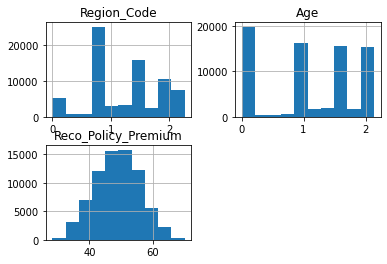

In [10]:
# Visualizing the transformed featres
training_data.hist()

In [11]:
X_train_sm = X_train_sm.drop(columns=['Region_Code','Age','Reco_Policy_Premium'])
X_train_sm = pd.concat([X_train_sm,training_data],axis=1)

In [12]:
X_train_sm.head()

,City_Code,Accomodation_Type,Reco_Insurance_Type,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Holding_Policy_Type_nan,Holding_Policy_Type_Max_count,Holding_Policy_Type_Min_count,Reco_Policy_Cat_Max,Reco_Policy_Cat_Min,Reco_Policy_Premium_Less,Reco_Policy_Premium_More,Married,UnMarried,Health Indicator_Max,Health Indicator_Min,Region_Code,Age,Reco_Policy_Premium
0,19.0,0.0,0.0,0.0,8.0,9.0,3.0,22.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,2.259549,2.134207,47.066968
1,9.0,1.0,0.0,0.0,2.0,0.0,1.0,19.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.259549,2.134207,41.040083
2,13.0,1.0,1.0,0.0,8.0,9.0,3.0,19.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.000000,1.539641,53.574279
3,22.0,0.0,0.0,0.0,6.0,1.0,1.0,16.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.853042,2.134207,45.488832
4,12.0,0.0,0.0,0.0,6.0,5.0,1.0,22.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.379782,1.539641,51.145075


In [13]:
# Standardizing the variables
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sm_norm = pd.DataFrame(sc.fit_transform(X_train_sm))
X_train_sm_norm.columns = X_train_sm.columns

In [14]:
X_train_sm_norm.head()

,City_Code,Accomodation_Type,Reco_Insurance_Type,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Holding_Policy_Type_nan,Holding_Policy_Type_Max_count,Holding_Policy_Type_Min_count,Reco_Policy_Cat_Max,Reco_Policy_Cat_Min,Reco_Policy_Premium_Less,Reco_Policy_Premium_More,Married,UnMarried,Health Indicator_Max,Health Indicator_Min,Region_Code,Age,Reco_Policy_Premium
0,-0.103581,-1.165979,-0.519239,-0.459105,1.227347,1.004596,0.748871,1.097075,-0.865087,1.790318,-0.315743,2.606650,-0.122146,0.891291,-0.891291,-0.459105,0.459105,1.802592,-0.035428,1.757578,1.347645,-0.244523
1,-1.436682,0.950387,-0.519239,-0.459105,-1.522192,-1.728824,-1.913778,0.581155,-0.865087,-0.625375,-0.315743,-0.433964,-0.122146,0.891291,-0.891291,-0.459105,0.459105,-0.621206,-0.035428,1.757578,1.347645,-1.095770
2,-0.903442,0.950387,2.057102,-0.459105,1.227347,1.004596,0.748871,0.581155,-0.865087,1.790318,-0.315743,-0.433964,-0.122146,-1.122005,1.122005,-0.459105,0.459105,1.802592,-0.035428,-2.049834,0.589290,0.674580
3,0.296349,-1.165979,-0.519239,-0.459105,0.310834,-1.425111,-1.913778,0.065234,-0.865087,-0.625375,-0.315743,-0.433964,-0.122146,0.891291,-0.891291,-0.459105,0.459105,-0.621206,-0.035428,1.072600,1.347645,-0.467422
4,-1.036752,-1.165979,-0.519239,-0.459105,0.310834,-0.210257,-1.913778,1.097075,-0.865087,-0.625375,-0.315743,2.606650,-0.122146,-1.122005,1.122005,-0.459105,0.459105,-0.621206,-0.035428,0.275141,0.589290,0.331475


#Feature Selection Techniques

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


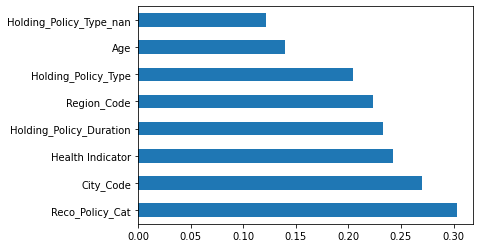

In [15]:
# Information Gain
#from sklearn.feature_selection import mutual_info_classif

#importances = mutual_info_classif(X_train_sm_norm,y_train_sm)
#feat_importances = pd.Series(importances,index=X_train_sm_norm.columns)
#feat_importances.nlargest(8).plot(kind="barh")

In [16]:
#selected_feat  = X_train_sm_norm[['Reco_Policy_Cat', 'City_Code', 'Health Indicator','Holding_Policy_Duration', 'Region_Code', 'Holding_Policy_Type','Age']]

In [61]:
# Using Extra Tree Classifier
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier(n_estimators=300)
model.fit(X_train_sm_norm,y_train_sm)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=300,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

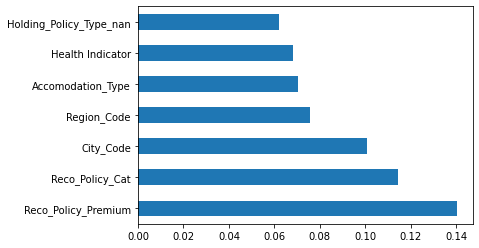

In [62]:
feat_importances=pd.Series(model.feature_importances_,index=X_train_sm_norm.columns)
feat_importances.nlargest(7).plot(kind="barh")

In [64]:
selected_feat = X_train_sm_norm[['Reco_Policy_Premium','Reco_Policy_Cat','City_Code','Region_Code','Accomodation_Type','Health Indicator','Holding_Policy_Type_nan']]

In [ ]:
# Using Lasso model for feature selection
#feature_set_model = SelectFromModel(Lasso(alpha=0.03,random_state=0))
#feature_set_model.fit(training_data,y_train_sm)

SelectFromModel(estimator=Lasso(alpha=0.03, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [ ]:
#feature_set_model.get_support() #True signifies that the particular feature is important

array([False, False, False, False, False, False, False, False, False,
        True, False,  True,  True,  True,  True, False, False, False,
       False, False,  True, False])

In [ ]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
#selected_feat = training_data.columns[(feature_set_model.get_support())]
#print('total features: {}'.format((training_data.shape[1])))
#print('selected features: {}'.format(len(selected_feat)))
#print('features with coefficients shrank to zero: {}'.format(
    #np.sum(feature_set_model.estimator_.coef_ == 0)))

total features: 22
selected features: 6
features with coefficients shrank to zero: 16


In [ ]:
#selected_feat

Index(['Reco_Policy_Cat', 'Holding_Policy_Type_nan',
       'Holding_Policy_Type_Max_count', 'Holding_Policy_Type_Min_count',
       'Reco_Policy_Cat_Max', 'Health Indicator_Max'],
      dtype='object')

In [65]:
X_train = selected_feat
X_train.head()

,Reco_Policy_Premium,Reco_Policy_Cat,City_Code,Region_Code,Accomodation_Type,Health Indicator,Holding_Policy_Type_nan
0,-0.244523,1.097075,-0.103581,1.757578,-1.165979,1.227347,-0.865087
1,-1.095770,0.581155,-1.436682,1.757578,0.950387,-1.522192,-0.865087
2,0.674580,0.581155,-0.903442,-2.049834,0.950387,1.227347,-0.865087
3,-0.467422,0.065234,0.296349,1.072600,-1.165979,0.310834,-0.865087
4,0.331475,1.097075,-1.036752,0.275141,-1.165979,0.310834,-0.865087


In [18]:
# Converting the output variable of the form (n_samples,)
y_train_sm=y_train_sm.values.ravel()

In [51]:
# Performing cros-validation
'''
from sklearn.model_selection import StratifiedKFold
model_3 = RandomForestClassifier()
accuracy =[]
skf = StratifiedKFold(n_splits=10, random_state=None)
skf.get_n_splits(X_train,y_train_sm)
for train_index, test_index in skf.split(X_train,y_train_sm):

    x1_train, x1_test = X_train.iloc[train_index], X_train.iloc[test_index]
    Y1_train, Y1_test = y_train_sm[train_index], y_train_sm[test_index]
    model_3.fit(x1_train,Y1_train)
    predictions = model_3.predict_proba(x1_test)[:,-1]
    score = roc_auc_score(Y1_test,predictions)
    accuracy.append(score)'''

In [52]:
#np.array(accuracy).mean()

0.8743887731129462

In [66]:
# Splitting into training and validation 
x_train,x_valid,Y_train,Y_valid=train_test_split(X_train,y_train_sm,test_size=0.3,random_state=0,stratify=y_train_sm)

#Models

In [67]:
# 1. Logistic Regression
model_1 = LogisticRegression()
model_1.fit(x_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [68]:
from sklearn.metrics import roc_curve
predictions = model_1.predict_proba(x_valid)[:,-1]
score = roc_auc_score(Y_valid,predictions)
score

0.5745989672811194

In [69]:
# Decision Tree Classifier
model_2 = DecisionTreeClassifier()
model_2.fit(x_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [70]:
predictions = model_2.predict_proba(x_valid)[:,-1]
score = roc_auc_score(Y_valid,predictions)
score

0.7747557445793539

In [71]:
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
model_3 = KNeighborsClassifier()
model_3.fit(x_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [72]:
predictions = model_3.predict_proba(x_valid)[:,-1]
score = roc_auc_score(Y_valid,predictions)
score

0.772366470157841

In [73]:
# RandomForest Classifier
model_4 = RandomForestClassifier()
model_4.fit(x_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [74]:
predictions = model_4.predict_proba(x_valid)[:,-1]
score = roc_auc_score(Y_valid,predictions)
score

0.8796018923509826

In [75]:
#Hyper-parameter Tuning RF
from sklearn.model_selection import RandomizedSearchCV
param_grid={'max_depth':range(1,8,2),'n_estimators':range(100,800,100),'max_features':range(2,7,1)}
grid_search = RandomizedSearchCV(RandomForestClassifier(),param_grid,verbose=1,cv=5,n_jobs=-1)
grid_search.fit(x_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  7.2min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [76]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features=6,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [77]:
grid_search_pred = grid_search.predict_proba(x_valid)[:,-1]
score = roc_auc_score(Y_valid,predictions)
score

0.8796018923509826

In [ ]:
# Using roc curve

#predictions = model_4.predict_proba(x_valid)[:,-1]

# calculate roc curves

#fpr, tpr, thresholds = roc_curve(Y_valid, predictions)

# calculate the g-mean for each threshold

#gmeans = np.sqrt(tpr * (1-fpr))

# locate the index of the largest g-mean

#ix = np.argmax(gmeans)
#print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# plot the roc curve for the model

#plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
#plt.plot(fpr, tpr, marker='.', label='Logistic')
#plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels

#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
#plt.legend()

# show the plot
#plt.show()


In [ ]:
# Preparing Testing Data
test_data.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0


In [ ]:
#Listing Null values in Numerical data
numerical_with_nan = [feature for feature in test_data.columns if test_data[feature].isnull().sum()>=1 and test_data[feature].dtypes!='O' ]
for feature in numerical_with_nan:
    print(feature,np.round(test_data[feature].isnull().mean(),4),'%missing values')

Holding_Policy_Type 0.3945 %missing values


In [ ]:
# Filling the missing values with mean
for feature in numerical_with_nan:
    mean_value = test_data[feature].mean()
    test_data[feature+'_nan'] = np.where(test_data[feature].isnull(),1,0)
    test_data[feature] = test_data[feature].fillna(mean_value)
test_data[numerical_with_nan].isnull().sum()

Holding_Policy_Type    0
dtype: int64

In [ ]:
# Dropping Employee Id column as it donot contribute in prediction.
testing_data = test_data.drop(columns=['ID'])
testing_data.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Holding_Policy_Type_nan
0,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.000000,5,11934.0,0
1,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.000000,18,32204.8,0
2,C1,564,Rented,Individual,28,28,No,X3,2.0,4.000000,17,9240.0,0
3,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.000000,18,9086.0,0
4,C1,951,Owned,Individual,75,75,No,X3,NaN,2.440085,5,22534.0,1


In [ ]:
#Listing null values in categorical data
features_with_nan = [feature for feature in testing_data.columns if testing_data[feature].isnull().sum()>=1 and testing_data[feature].dtypes=='O']
for feature in features_with_nan:
    print(feature,np.round(testing_data[feature].isnull().mean(),4),'%missing values')

Health Indicator 0.2305 %missing values
Holding_Policy_Duration 0.3945 %missing values


In [ ]:
def replace_cat_feature(dataset,features_with_nan):
    data = testing_data.copy()
    data[features_with_nan] = data[features_with_nan].fillna("Missing")
    return data
testing_data = replace_cat_feature(testing_data,features_with_nan)
testing_data[features_with_nan].isnull().sum()

Health Indicator           0
Holding_Policy_Duration    0
dtype: int64

In [ ]:
# Since, Upper_Age and Lower_Age columns are strongly correlated, therefore dropping the Lower_Age column and renaming the Upper_Age column to Age
testing_data = testing_data.drop(columns=['Lower_Age'],axis=1)
testing_data = testing_data.rename(columns={'Upper_Age':"Age"})
testing_data.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Holding_Policy_Type_nan
0,C1,156,Owned,Individual,30,No,Missing,6.0,3.000000,5,11934.0,0
1,C4,7,Owned,Joint,69,Yes,X1,3.0,3.000000,18,32204.8,0
2,C1,564,Rented,Individual,28,No,X3,2.0,4.000000,17,9240.0,0
3,C3,1177,Rented,Individual,23,No,X3,3.0,3.000000,18,9086.0,0
4,C1,951,Owned,Individual,75,No,X3,Missing,2.440085,5,22534.0,1


In [ ]:
# Feature Engineering Numerical Discrete Features: ['Holding_Policy_Type', 'Reco_Policy_Cat']
# 1. Holding_Policy_Type
max_cat_policy_type = testing_data['Holding_Policy_Type'].value_counts().index[1]   #3.0
min_cat_policy_type = testing_data['Holding_Policy_Type'].value_counts().index[-1]  #4.0
testing_data['Holding_Policy_Type_Max_count'] = np.where(testing_data['Holding_Policy_Type']== max_cat_policy_type,1,0)
testing_data['Holding_Policy_Type_Min_count'] = np.where(testing_data['Holding_Policy_Type']== min_cat_policy_type,1,0)

# 2. Reco_Policy_Cat
max_count_health = testing_data['Reco_Policy_Cat'].value_counts().index[0]
min_count_health = testing_data['Reco_Policy_Cat'].value_counts().index[-1]
testing_data['Reco_Policy_Cat_Max'] = np.where(testing_data['Reco_Policy_Cat']== max_count_health,1,0)
testing_data['Reco_Policy_Cat_Min'] = np.where(testing_data['Reco_Policy_Cat']== min_count_health,1,0)

In [ ]:
# Feature Engineering Numerical Continuous Features: ['Region_Code', 'Age','Reco_Policy_Premium']
# 1. Region_Code
for i in range(testing_data.shape[0]):
  if testing_data["Region_Code"][i] in range(0,1001):
    testing_data['Region_Code'][i] = 'Code within 1000'
  elif testing_data["Region_Code"][i] in range(1001,2001):
    testing_data['Region_Code'][i] = 'Code within 2000'
  elif testing_data["Region_Code"][i] in range(2001,3001):
    testing_data['Region_Code'][i] = 'Code within 3000'
  elif testing_data["Region_Code"][i] in range(3001,4001):
    testing_data['Region_Code'][i] = 'Code within 4000'
  elif testing_data["Region_Code"][i] in range(4001,7001):
    testing_data['Region_Code'][i] = 'Code within 7000'

# 2. 'Age'
for i in range(testing_data.shape[0]):
  if testing_data["Age"][i] in range(0,31):
    testing_data['Age'][i] = 'Within_30'
  elif testing_data["Age"][i] in range(31,46):
    testing_data['Age'][i] = 'Within_45'
  elif testing_data["Age"][i] in range(46,61):
    testing_data['Age'][i] = 'Within_60'
  elif testing_data["Age"][i] in range(61,81):
    testing_data['Age'][i] = 'Above_60'

# 3. 'Reco_Policy_Premium'
mean_premium = testing_data['Reco_Policy_Premium'].mean()
testing_data['Reco_Policy_Premium_Less'] = np.where(testing_data['Reco_Policy_Premium']<=mean_premium,1,0)
testing_data['Reco_Policy_Premium_More'] = np.where(testing_data['Reco_Policy_Premium']>mean_premium,1,0)

In [ ]:
# Feature Engineering Categorical Features: [City_Code,Accomodation_Type,Reco_Insurance_Type,Is_Spouse,Health Indicator,Holding_Policy_Duration]
#1. Is_Spouse
testing_data["Married"] = np.where(testing_data['Is_Spouse']=='Yes',1,0)
testing_data["UnMarried"] = np.where(testing_data['Is_Spouse']=='No',1,0)

#2. Health Indicator
indicator_max_count = testing_data['Health Indicator'].value_counts().index[0]
indicator_min_count = testing_data['Health Indicator'].value_counts().index[-1]
indicator_mising_count = testing_data['Health Indicator'].value_counts().index[1]
testing_data['Health Indicator_Max'] = np.where(testing_data['Health Indicator']== indicator_max_count,1,0)
testing_data['Health Indicator_Min'] = np.where(testing_data['Health Indicator']== indicator_min_count,1,0)

In [ ]:
testing_data.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Holding_Policy_Type_nan,Holding_Policy_Type_Max_count,Holding_Policy_Type_Min_count,Reco_Policy_Cat_Max,Reco_Policy_Cat_Min,Reco_Policy_Premium_Less,Reco_Policy_Premium_More,Married,UnMarried,Health Indicator_Max,Health Indicator_Min
0,C1,Code within 1000,Owned,Individual,Within_30,No,Missing,6.0,3.000000,5,11934.0,0,1,0,0,0,1,0,0,1,0,0
1,C4,Code within 1000,Owned,Joint,Above_60,Yes,X1,3.0,3.000000,18,32204.8,0,1,0,0,0,0,1,1,0,1,0
2,C1,Code within 1000,Rented,Individual,Within_30,No,X3,2.0,4.000000,17,9240.0,0,0,1,0,0,1,0,0,1,0,0
3,C3,Code within 2000,Rented,Individual,Within_30,No,X3,3.0,3.000000,18,9086.0,0,1,0,0,0,1,0,0,1,0,0
4,C1,Code within 1000,Owned,Individual,Above_60,No,X3,Missing,2.440085,5,22534.0,1,0,0,0,0,0,1,0,1,0,0


In [ ]:
testing_data.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Holding_Policy_Type_nan,Holding_Policy_Type_Max_count,Holding_Policy_Type_Min_count,Reco_Policy_Cat_Max,Reco_Policy_Cat_Min,Reco_Policy_Premium_Less,Reco_Policy_Premium_More,Married,UnMarried,Health Indicator_Max,Health Indicator_Min
0,0,0,0,0,0,0,1,7,3.000000,5,11934.0,0,1,0,0,0,1,0,0,1,0,0
1,3,0,0,1,3,1,0,4,3.000000,18,32204.8,0,1,0,0,0,0,1,1,0,1,0
2,0,0,1,0,0,0,3,3,4.000000,17,9240.0,0,0,1,0,0,1,0,0,1,0,0
3,2,1,1,0,0,0,3,4,3.000000,18,9086.0,0,1,0,0,0,1,0,0,1,0,0
4,0,0,0,0,3,0,3,0,2.440085,5,22534.0,1,0,0,0,0,0,1,0,1,0,0


In [ ]:
# Storing the work 
testing_data.to_csv("test.csv",index=False)

In [43]:
testing_feature_data = pd.read_csv('test.csv')

In [44]:
# Feature Scaling
feature_scale = [feature for feature in testing_feature_data.columns if feature in ['Region_Code','Age','Reco_Policy_Premium']]
pt = PowerTransformer(method='yeo-johnson',standardize=False)
pt.fit(testing_feature_data[feature_scale])

PowerTransformer(copy=True, method='yeo-johnson', standardize=False)

In [45]:
# transforming the data
testing = pd.DataFrame(pt.transform(testing_feature_data[feature_scale]),columns=feature_scale)
testing.head()

,Region_Code,Age,Reco_Policy_Premium
0,-0.000000,0.000000,50.839128
1,-0.000000,1.982266,69.324397
2,-0.000000,0.000000,46.890971
3,0.640846,0.000000,46.641913
4,-0.000000,1.982266,62.043015


In [46]:
X_testing = testing_feature_data.drop(columns=['Region_Code','Age','Reco_Policy_Premium'])
X_testing = pd.concat([X_testing,testing],axis=1)
X_testing.head()

,City_Code,Accomodation_Type,Reco_Insurance_Type,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Holding_Policy_Type_nan,Holding_Policy_Type_Max_count,Holding_Policy_Type_Min_count,Reco_Policy_Cat_Max,Reco_Policy_Cat_Min,Reco_Policy_Premium_Less,Reco_Policy_Premium_More,Married,UnMarried,Health Indicator_Max,Health Indicator_Min,Region_Code,Age,Reco_Policy_Premium
0,0,0,0,0,1,7,3.000000,5,0,1,0,0,0,1,0,0,1,0,0,-0.000000,0.000000,50.839128
1,3,0,1,1,0,4,3.000000,18,0,1,0,0,0,0,1,1,0,1,0,-0.000000,1.982266,69.324397
2,0,1,0,0,3,3,4.000000,17,0,0,1,0,0,1,0,0,1,0,0,-0.000000,0.000000,46.890971
3,2,1,0,0,3,4,3.000000,18,0,1,0,0,0,1,0,0,1,0,0,0.640846,0.000000,46.641913
4,0,0,0,0,3,0,2.440085,5,1,0,0,0,0,0,1,0,1,0,0,-0.000000,1.982266,62.043015


In [47]:
# Normalising variables
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_testing_norm = pd.DataFrame(sc.fit_transform(X_testing))
X_testing_norm.columns = X_testing.columns
X_testing_norm.head()

,City_Code,Accomodation_Type,Reco_Insurance_Type,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Holding_Policy_Type_nan,Holding_Policy_Type_Max_count,Holding_Policy_Type_Min_count,Reco_Policy_Cat_Max,Reco_Policy_Cat_Min,Reco_Policy_Premium_Less,Reco_Policy_Premium_More,Married,UnMarried,Health Indicator_Max,Health Indicator_Min,Region_Code,Age,Reco_Policy_Premium
0,-0.909425,-0.896413,-0.507370,-0.443060,-0.509653,1.072196,0.693515,-1.608585,-0.807245,1.706844,-0.309489,-0.388305,-0.12146,0.903927,-0.903927,-0.443060,0.443060,-0.588843,-0.035857,-1.127184,-1.329323,-0.208473
1,-0.523730,-0.896413,1.970947,2.257031,-1.116887,0.257418,0.693515,0.454036,-0.807245,1.706844,-0.309489,-0.388305,-0.12146,-1.106284,1.106284,2.257031,-2.257031,1.698246,-0.035857,-1.127184,1.296389,2.166518
2,-0.909425,1.115557,-0.507370,-0.443060,0.704815,-0.014174,1.932122,0.295373,-0.807245,-0.585877,3.231128,-0.388305,-0.12146,0.903927,-0.903927,-0.443060,0.443060,-0.588843,-0.035857,-1.127184,-1.329323,-0.715733
3,-0.652295,1.115557,-0.507370,-0.443060,0.704815,0.257418,0.693515,0.454036,-0.807245,1.706844,-0.309489,-0.388305,-0.12146,0.903927,-0.903927,-0.443060,0.443060,-0.588843,-0.035857,0.142607,-1.329323,-0.747731
4,-0.909425,-0.896413,-0.507370,-0.443060,0.704815,-0.828952,0.000000,-1.608585,1.238782,-0.585877,-0.309489,-0.388305,-0.12146,-1.106284,1.106284,-0.443060,0.443060,-0.588843,-0.035857,-1.127184,1.296389,1.231005


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc886f38090>,
      dtype=object)

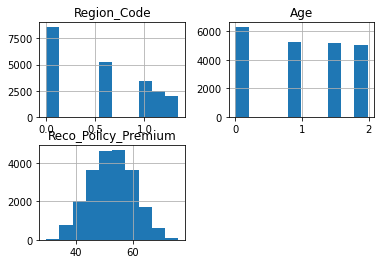

In [ ]:
# Visualizing the transformed featres
testing.hist()

In [78]:
#Feature selection 
X_test = X_testing_norm
X_test = X_test[['Reco_Policy_Premium','Reco_Policy_Cat','City_Code','Region_Code','Accomodation_Type','Health Indicator','Holding_Policy_Type_nan']]
#X_test = selected_feat

In [79]:
X_test.head()

,Reco_Policy_Premium,Reco_Policy_Cat,City_Code,Region_Code,Accomodation_Type,Health Indicator,Holding_Policy_Type_nan
0,-0.208473,-1.608585,-0.909425,-1.127184,-0.896413,-0.509653,-0.807245
1,2.166518,0.454036,-0.523730,-1.127184,-0.896413,-1.116887,-0.807245
2,-0.715733,0.295373,-0.909425,-1.127184,1.115557,0.704815,-0.807245
3,-0.747731,0.454036,-0.652295,0.142607,1.115557,0.704815,-0.807245
4,1.231005,-1.608585,-0.909425,-1.127184,-0.896413,0.704815,1.238782


In [80]:
# Final Predicitions
final_predictions = model_4.predict_proba(X_test)[:,-1]

In [81]:
final_predictions = pd.DataFrame(final_predictions)
final_predictions.columns = ["Response"]

In [82]:
final_predictions = pd.concat([test_data["ID"],final_predictions],axis=1)
final_predictions.head()

,ID,Response
0,50883,1.0
1,50884,1.0
2,50885,1.0
3,50886,1.0
4,50887,1.0
